In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

In [3]:
sample1 = full_data.sample(5)
sample1

,user_id,age,drinks_coffee,height
469,6051,>=21,True,68.717822
2635,3405,>=21,True,69.015309
1898,7983,<21,False,66.418863
2795,6606,>=21,True,69.914371
167,4610,>=21,True,66.670203


In [4]:
full_data.height.mean()

67.59748697307934

In [5]:
sample1.height.mean()

68.14731342421403

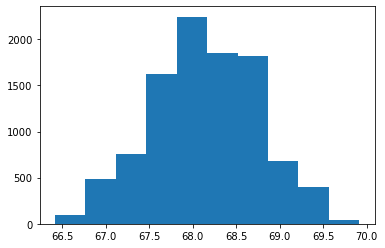

In [7]:
sampling_dist_mean5 = []

for _ in range(10000):
    sample_of_5 = sample1.sample(5, replace=True)
    sample_mean = sample_of_5.height.mean()
    sampling_dist_mean5.append(sample_mean)
    
plt.hist(sampling_dist_mean5);


In [11]:
std_sampling_dist = np.std(sampling_dist_mean5)
std_sampling_dist

np.std(sample1.height)

1.368998422783854

In [10]:
std_full_data = np.std(full_data)
std_full_data

user_id          1833.337697
drinks_coffee       0.491874
height              3.118909
dtype: float64

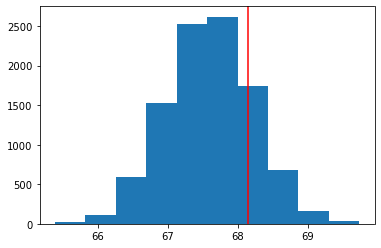

In [13]:
null_mean = 67.60
null_vals = np.random.normal(null_mean, std_sampling_dist, 10000)
plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color = 'red'); 

In [17]:
# obs_mean = sample1.height.mean()

# prob_more_extreme_high = (null_vals > obs_mean).mean()
# prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_vals).mean()
# pval = prob_more_extreme_low + prob_more_extreme_high
# pval

obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
prob_more_extreme_high = (null_vals > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

null_mean = 67.60  
# this is another way to compute the standard deviation of the sampling distribution theoretically  
std_sampling_dist = full_data.height.std()/np.sqrt(5)  
num_sims = 10000

null_sims = np.random.normal(null_mean, std_sampling_dist, num_sims)  
low_ext = (null_mean - (sample1.height.mean() - null_mean))  
high_ext = sample1.height.mean()  

(null_sims > high_ext).mean() + (null_sims < low_ext).mean()

0.3762

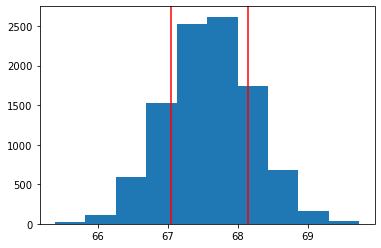

In [19]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red');
plt.axvline(x=upper_bound, color = 'red');

In [20]:
print(upper_bound, lower_bound)

68.14731342421403 67.05268657578596


In [21]:
sample2 = full_data.sample(300)

obs_mean = sample2.height.mean()

In [22]:
sampling_dist_mean300 = []

for _ in range(10000):
    sample_of_300 = sample2.sample(300, replace = True)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
std_sampling_dist300 = np.std(sampling_dist_mean300)    
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

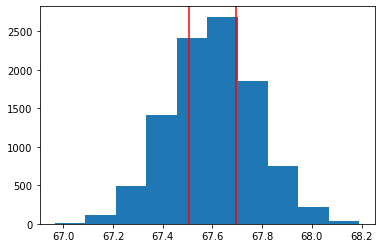

In [23]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [24]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

0.5851999999999999